# Tipologia i cicle de vida de les dades - Pràctica 2

_Integrants: Ana García Buendia i Anna Garcia Martinez_

_Enllaç al GitHub: https://github.com/annagm14/Tipologia-PRA2_

### Importem les llibreries necessàries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### 1. Descripció del dataset
Perquè és important i quina pregunta/problema pretén
respondre? Resumeix breument les variables que el formen i el seu tamany.

In [2]:
df = pd.read_csv(r'./original_dataset_air_pollution.csv')
df

C:\Users\anaga\AppData\Local\Temp\ipykernel_19624\3539695684.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'./original_dataset_air_pollution.csv')


,CODI EOI,NOM ESTACIO,DATA,MAGNITUD,CONTAMINANT,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,...,19h,20h,21h,22h,23h,24h,ALTITUD,LATITUD,LONGITUD,Georeferència
0,43005002,Alcover,24/12/2024,14,O3,µg/m3,industrial,rural,43005,Alcover,...,NaN,NaN,NaN,NaN,NaN,NaN,238,41.278687,1.179898,NaN
1,25051002,Bellver de Cerdanya (el Talló),24/12/2024,10,PM10,µg/m3,background,rural,25051,Bellver de Cerdanya,...,NaN,NaN,NaN,NaN,NaN,NaN,1057,42.362896,1.779653,NaN
2,8019044,Barcelona (Gràcia - Sant Gervasi),24/12/2024,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,57,41.398724,2.153399,NaN
3,8279011,Terrassa,24/12/2024,12,NOX,µg/m3,traffic,urban,8279,Terrassa,...,NaN,NaN,NaN,NaN,NaN,NaN,109,41.556114,2.007398,NaN
4,8019058,Barcelona (Observatori Fabra),24/12/2024,12,NOX,µg/m3,background,suburban,8019,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,415,41.418430,2.123897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370863,8015001,Badalona,01/01/1991,14,O3,µg/m3,traffic,urban,8015,Badalona,...,3.0,4.0,4.0,4.0,4.0,4.0,6,41.443584,2.238890,POINT (2.23889 41.443584)
3370864,8015001,Badalona,01/01/1991,1,SO2,µg/m3,traffic,urban,8015,Badalona,...,14.0,11.0,11.0,11.0,11.0,12.0,6,41.443584,2.238890,POINT (2.23889 41.443584)
3370865,8015001,Badalona,01/01/1991,6,CO,mg/m3,traffic,urban,8015,Badalona,...,2.7,2.3,2.1,1.9,1.4,1.2,6,41.443584,2.238890,POINT (2.23889 41.443584)
3370866,8268004,Cercs (St. Jordi),01/01/1991,1,SO2,µg/m3,industrial,rural,8268,Cercs,...,10.0,3.0,0.0,0.0,0.0,0.0,740,42.148895,1.857501,POINT (1.857501 42.148895)


Aquest dataset ens mostra les dades dels contmainants mesurats en punts de la Xarxa de Vigilància i Previsió de la Contaminació Atmosfèrica des de l’any 1991 fins al dia anterior a l’actual (23/12/2024). Hem extret les dades de [1].

Aquest conjunt de dades ens ajudarà a saber quins contaminants tenen més presència i a quines regions i hores a Catalunya.


[1]: https://analisi.transparenciacatalunya.cat/Medi-Ambient/Qualitat-de-l-aire-als-punts-de-mesurament-autom-t/tasf-thgu/about_data

In [3]:
df.shape

(3370868, 40)

In [4]:
df.dtypes

CODI EOI           int64
NOM ESTACIO       object
DATA              object
MAGNITUD           int64
CONTAMINANT       object
UNITATS           object
TIPUS ESTACIO     object
AREA URBANA       object
CODI INE           int64
MUNICIPI          object
CODI COMARCA       int64
NOM COMARCA       object
01h              float64
02h              float64
03h              float64
04h              float64
05h              float64
06h              float64
07h              float64
08h              float64
09h              float64
10h              float64
11h              float64
12h              float64
13h              float64
14h              float64
15h              float64
16h              float64
17h              float64
18h              float64
19h              float64
20h              float64
21h              float64
22h              float64
23h              float64
24h              float64
ALTITUD            int64
LATITUD          float64
LONGITUD         float64
Georeferència     object


### Descripció de les variables
* CODI EOI: Codi format per la província, codi del municii i codi de l'estació
* NOM ESTACIO: Nom de la cabina
* DATA: Data de la mesura
* MAGNITUD: Codi que identifica el contaminant
* CONTAMINANT: Fórmula química del contaminant
* UNITATS: Unitats de mesura del contaminant
* TIPUS ESTACIO: Si el valor és Traffic, el punt de mesura rep l'impacte directe de les emissions del trànsit. Si el valor és Industrial el punt rep les emissions industrials. Si el valor és Background , el punt rep les emissions d'altres punts del territori.
* AREA URBANA: Si el valor és Urban, el punt es troba en àrea urbana. Si el valor és Peri-urban, el punt es troba a les afores de la ciutat. Si el valor és Rural, el punt es troba en un lloc que no és ni àrea urbana ni suburbana.
* CODI INE: Codi del municipi
* MUNICIPI: Nom del municipi on es troba el punt
* CODI COMARCA: Codi de la comarca on es troba el punt
* NOM COMARCA: Nom de la comarca on es troba la cabina
* 01h - 24h: 24 columnes, una per cada hora on es mesura la contaminació
* ALTITUD: Altitud de l'estació
* LATITUD: Latitud de l'estació en graus decimals
* LONGITUD: Longitud de l'estació en graus decimals
* Georeferència: Punt geogràfic de l'estació

## 2. Integració i selecció
 Pot ser el resultat adicionar diferents datasets o una subselecció útil de les dades originals, en base a l’objectiu que es vulgui aconseguir. Si es decideix treballar amb una selecció de les dades, és molt important que aquesta estigui degudament justificada. A més, es recomana mostrar un resum de les dades que permeti veure a simple vista les diferents variables i els seus rangs de valors.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370868 entries, 0 to 3370867
Data columns (total 40 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CODI EOI       int64  
 1   NOM ESTACIO    object 
 2   DATA           object 
 3   MAGNITUD       int64  
 4   CONTAMINANT    object 
 5   UNITATS        object 
 6   TIPUS ESTACIO  object 
 7   AREA URBANA    object 
 8   CODI INE       int64  
 9   MUNICIPI       object 
 10  CODI COMARCA   int64  
 11  NOM COMARCA    object 
 12  01h            float64
 13  02h            float64
 14  03h            float64
 15  04h            float64
 16  05h            float64
 17  06h            float64
 18  07h            float64
 19  08h            float64
 20  09h            float64
 21  10h            float64
 22  11h            float64
 23  12h            float64
 24  13h            float64
 25  14h            float64
 26  15h            float64
 27  16h            float64
 28  17h            float64
 29  18h           

Ens cal veure en primer lloc, quins contmainants detecta el dataset que tractem i en quines unitats els mesura:

In [6]:
contaminant = df['CONTAMINANT'].unique()

In [7]:
unitats = df['UNITATS'].unique()

In [8]:
unique_combinations = df[["CONTAMINANT", "UNITATS"]].drop_duplicates()

print("Unique combinations present in the dataset:")
print(unique_combinations)

Unique combinations present in the dataset:
        CONTAMINANT UNITATS
0                O3   µg/m3
1              PM10   µg/m3
2               SO2   µg/m3
3               NOX   µg/m3
5                NO   µg/m3
6               H2S   µg/m3
12              NO2   µg/m3
13             C6H6   µg/m3
23               CO   mg/m3
24            PM2.5   µg/m3
64              PM1   µg/m3
230              Hg   ng/m3
49595           NaN     NaN
496438          Cl2   µg/m3
517860          H2S   ug/m3
1906012        HCNM     ppm
1906037         HCT     ppm
2080777          PS   µg/m3
2560264         HCl   µg/m3


Basant-nos en la següent imatge, farem un model predictor que es centri en els contaminants pels quals tenim un barem en qué fixar-nos:

Aquesta imatge ha estat extreta del Índex Català de la Qualitat de l'Aire (ICQA): https://mediambient.gencat.cat/ca/05_ambits_dactuacio/atmosfera/qualitat_de_laire/avaluacio/icqa/

![image](barems_contaminants.jpeg)

In [9]:
contaminants_interes = ["NO2", "PM10", "PM2.5", "O3", "SO2", "CO", "C6H6", "H2S"]

df_filtrat = df[df["CONTAMINANT"].isin(contaminants_interes)]

Ens cal pivotar la taula per tal de poder tractar cada hora per separat i no en una fila tots junts. Això vol dir passar de tenir una columna per cada hora a tenir una variable `hora` i una variable `valor_mesurat`

In [10]:
df_filtrat.head(5)

,CODI EOI,NOM ESTACIO,DATA,MAGNITUD,CONTAMINANT,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,...,19h,20h,21h,22h,23h,24h,ALTITUD,LATITUD,LONGITUD,Georeferència
0,43005002,Alcover,24/12/2024,14,O3,µg/m3,industrial,rural,43005,Alcover,...,NaN,NaN,NaN,NaN,NaN,NaN,238,41.278687,1.179898,NaN
1,25051002,Bellver de Cerdanya (el Talló),24/12/2024,10,PM10,µg/m3,background,rural,25051,Bellver de Cerdanya,...,NaN,NaN,NaN,NaN,NaN,NaN,1057,42.362896,1.779653,NaN
2,8019044,Barcelona (Gràcia - Sant Gervasi),24/12/2024,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,57,41.398724,2.153399,NaN
6,8102005,Igualada,24/12/2024,65,H2S,µg/m3,industrial,suburban,8102,Igualada,...,NaN,NaN,NaN,NaN,NaN,NaN,311,41.578400,1.623006,NaN
8,8184006,Rubí,24/12/2024,10,PM10,µg/m3,background,urban,8184,Rubí,...,NaN,NaN,NaN,NaN,NaN,NaN,171,41.492115,2.042497,NaN


In [11]:
df_pivotat = pd.melt(df_filtrat, 
                     id_vars=["DATA", "CODI EOI", "CONTAMINANT", "NOM ESTACIO", "MAGNITUD", "UNITATS", 
                              "TIPUS ESTACIO", "AREA URBANA", "CODI INE", "MUNICIPI", "CODI COMARCA", 
                              "NOM COMARCA", "ALTITUD", "LONGITUD", "LATITUD", "Georeferència"], 
                     var_name="hora", 
                     value_name="valor_mesurat")

In [12]:
df_pivotat.shape

(54508560, 18)

Observem com queda el dataframe pivotat:

In [13]:
df_pivotat.head(10)

,DATA,CODI EOI,CONTAMINANT,NOM ESTACIO,MAGNITUD,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,CODI COMARCA,NOM COMARCA,ALTITUD,LONGITUD,LATITUD,Georeferència,hora,valor_mesurat
0,24/12/2024,43005002,O3,Alcover,14,µg/m3,industrial,rural,43005,Alcover,1,Alt Camp,238,1.179898,41.278687,NaN,01h,82.0
1,24/12/2024,25051002,PM10,Bellver de Cerdanya (el Talló),10,µg/m3,background,rural,25051,Bellver de Cerdanya,15,Cerdanya,1057,1.779653,42.362896,NaN,01h,7.0
2,24/12/2024,8019044,SO2,Barcelona (Gràcia - Sant Gervasi),1,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,57,2.153399,41.398724,NaN,01h,1.0
3,24/12/2024,8102005,H2S,Igualada,65,µg/m3,industrial,suburban,8102,Igualada,6,Anoia,311,1.623006,41.578400,NaN,01h,6.1
4,24/12/2024,8184006,PM10,Rubí,10,µg/m3,background,urban,8184,Rubí,40,Vallès Occidental,171,2.042497,41.492115,NaN,01h,19.0
5,24/12/2024,8019004,NO2,Barcelona (Poblenou),8,µg/m3,background,urban,8019,Barcelona,13,Barcelonès,3,2.204501,41.403880,NaN,01h,49.0
6,24/12/2024,8089005,C6H6,Gavà,30,µg/m3,background,suburban,8089,Gavà,11,Baix Llobregat,25,1.991498,41.303097,NaN,01h,0.6
7,24/12/2024,43148028,SO2,Tarragona (Parc de la Ciutat),1,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,13,1.241703,41.117400,NaN,01h,2.0
8,24/12/2024,43047001,C6H6,Constantí,30,µg/m3,industrial,suburban,43047,Constantí,36,Tarragonès,56,1.217701,41.154930,NaN,01h,0.6
9,24/12/2024,8019044,NO2,Barcelona (Gràcia - Sant Gervasi),8,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,57,2.153399,41.398724,NaN,01h,18.0


## 3. Neteja de les dades
### 3.1 Les dades contenen zeros, elements buits o altres valors numèrics que indiquin la pèrdua de dades? Gestiona cadascun d'aquests casos utilitzant el métode d'imputació que consideris més adequat.

Al pivotar el data frame s'han creat moltes linies amb missings per tant aquests casos els eliminarem ja que no ens aporta cap infomració.

In [14]:
df_pivotat = df_pivotat.dropna(subset=['valor_mesurat'])

In [15]:
df_pivotat.shape

(52598038, 18)

Veiem que després de fer el dropna hem reduït el nombre de files de 56779750 a 54708142 (un 4% de les dades eliminades). Normalment, si tractem amb menys de un 5% de nuls a les dades es pot fer un drop de les dades que falten sense que afecti a la qualitat del model.

### 3.4 Justifica la necessitat d'altres mètodes de neteja per a aquest dataset en particular i, de ser necessari, aplica'ls.

Creem la variable QUALITAT on es classifica la qualitat de l'aire a partir dels barems que hem vist en la imatge dels Nivells determinats per la ICQA. Així passarem de tenir una variable numèrica a preveure a tenir una variable categòrica, que ens servirà per fer una tasca de classificació més senzilla.

In [16]:
# Diccionari de rangs i categories
rang_categories = {
    "NO2": [0, 40, 90, 120, 230, 340, float('inf')],
    "PM10": [0, 20, 40, 50, 100, 150, float('inf')],
    "PM2.5": [0, 10, 20, 25, 50, 75, float('inf')],
    "O3": [0, 50, 100, 130, 204, 380, float('inf')],
    "SO2": [0, 100, 200, 350, 500, 750, float('inf')],
    "CO": [0, 2, 5, 10, 20, 50, float('inf')],
    "C6H6": [0, 5, 10, 20, 50, 100, float('inf')],
    "H2S": [0, 25, 50, 100, 200, 500, float('inf')]
}

categories = ["Bona", "Raonablement Bona", "Regular", "Desfavorable", "Molt Desfavorable", "Extremadament Desfavorable"]

In [17]:
# Funció vectoritzada

def classificar_contaminants_vectoritzat(df):
    # Aplicar la classificació per a cada contaminant
    def obtenir_qualitat(contaminant, valor):
        if contaminant in rang_categories:
            rangs = rang_categories[contaminant]
            idx = np.digitize(valor, rangs, right=True)
            return categories[idx - 1] if idx <= len(categories) else categories[-1]
        else:
            return np.nan  # Retorna un valor nul si el contaminant no té rangs definits
    
    # Vectoritzar l'aplicació
    df['QUALITAT'] = [
        obtenir_qualitat(contaminant, valor) 
        for contaminant, valor in zip(df['CONTAMINANT'], df['valor_mesurat'])
    ]
    return df

In [18]:
from pandas.api.types import CategoricalDtype
# Aplicar la funció al DataFrame
df_classificat = classificar_contaminants_vectoritzat(df_pivotat)

ordre_categories = CategoricalDtype(categories=categories, ordered=True)
df_classificat['QUALITAT'] = df_classificat['QUALITAT'].astype(ordre_categories)
print(df_classificat[['CONTAMINANT', 'valor_mesurat', 'QUALITAT']])

         CONTAMINANT  valor_mesurat                    QUALITAT
0                 O3           82.0           Raonablement Bona
1               PM10            7.0                        Bona
2                SO2            1.0                        Bona
3                H2S            6.1                        Bona
4               PM10           19.0                        Bona
...              ...            ...                         ...
54508555          O3            4.0                        Bona
54508556         SO2           12.0                        Bona
54508557          CO            1.2                        Bona
54508558         SO2            0.0  Extremadament Desfavorable
54508559         SO2           48.0                        Bona

[52598038 rows x 3 columns]


Observem la nova columna de QUALITAT amb els valors de valor_mesurat mostrejats:

In [19]:
df_classificat.head(10)

,DATA,CODI EOI,CONTAMINANT,NOM ESTACIO,MAGNITUD,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,CODI COMARCA,NOM COMARCA,ALTITUD,LONGITUD,LATITUD,Georeferència,hora,valor_mesurat,QUALITAT
0,24/12/2024,43005002,O3,Alcover,14,µg/m3,industrial,rural,43005,Alcover,1,Alt Camp,238,1.179898,41.278687,NaN,01h,82.0,Raonablement Bona
1,24/12/2024,25051002,PM10,Bellver de Cerdanya (el Talló),10,µg/m3,background,rural,25051,Bellver de Cerdanya,15,Cerdanya,1057,1.779653,42.362896,NaN,01h,7.0,Bona
2,24/12/2024,8019044,SO2,Barcelona (Gràcia - Sant Gervasi),1,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,57,2.153399,41.398724,NaN,01h,1.0,Bona
3,24/12/2024,8102005,H2S,Igualada,65,µg/m3,industrial,suburban,8102,Igualada,6,Anoia,311,1.623006,41.578400,NaN,01h,6.1,Bona
4,24/12/2024,8184006,PM10,Rubí,10,µg/m3,background,urban,8184,Rubí,40,Vallès Occidental,171,2.042497,41.492115,NaN,01h,19.0,Bona
5,24/12/2024,8019004,NO2,Barcelona (Poblenou),8,µg/m3,background,urban,8019,Barcelona,13,Barcelonès,3,2.204501,41.403880,NaN,01h,49.0,Raonablement Bona
6,24/12/2024,8089005,C6H6,Gavà,30,µg/m3,background,suburban,8089,Gavà,11,Baix Llobregat,25,1.991498,41.303097,NaN,01h,0.6,Bona
7,24/12/2024,43148028,SO2,Tarragona (Parc de la Ciutat),1,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,13,1.241703,41.117400,NaN,01h,2.0,Bona
8,24/12/2024,43047001,C6H6,Constantí,30,µg/m3,industrial,suburban,43047,Constantí,36,Tarragonès,56,1.217701,41.154930,NaN,01h,0.6,Bona
9,24/12/2024,8019044,NO2,Barcelona (Gràcia - Sant Gervasi),8,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,57,2.153399,41.398724,NaN,01h,18.0,Bona


 De la variable DATA es pot extreure informació i crear noves variables interessants.

In [20]:
from workalendar.europe import Spain
import pandas as pd

def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Hivern'
    elif date.month in [3, 4, 5]:
        return 'Primavera'
    elif date.month in [6, 7, 8]:
        return 'Estiu'
    else:
        return 'Tardor'


df_classificat['DATA'] = pd.to_datetime(df_classificat['DATA'], format='%d/%m/%Y', errors='coerce')
df_classificat['ES_FINDE'] = df_classificat['DATA'].dt.dayofweek >= 5  # dissabte (5) o diumenge (6)

# Convertir a una variable categòrica (0: entre semana, 1: cap de setmana)
df_classificat['ES_FINDE'] = df_classificat['ES_FINDE'].astype(int)

# Carrega el calendari de Catalunya
cal = Spain()
cal.region = 'Catalonia'

# Crea una columna per indicar si és festiu
df_classificat['ES_FESTIU'] = df_classificat['DATA'].apply(lambda x: cal.is_holiday(x.date()))

# no laborable seràn els caps de setmana i els dies festius
df_classificat['NO_LABORABLE'] = (df_classificat['ES_FINDE'] | df_classificat['ES_FESTIU']).astype(int)
df_classificat = df_classificat.drop(['ES_FINDE', 'ES_FESTIU'], axis=1)

df_classificat['ESTACION'] = df_classificat['DATA'].apply(get_season)



In [21]:
df_classificat['hora_numeric'] = df_classificat['hora'].str.replace('h', '').astype(int)

# Agrupar en intervals de 6 hores
bins = [0, 6, 12, 18, 24]
labels = ['00-05h', '06-11h', '12-17h', '18-23h']
df_classificat['hora_agrupada'] = pd.cut(df_classificat['hora_numeric'], bins=bins, labels=labels, right=False)
df_classificat.head(5)

,DATA,CODI EOI,CONTAMINANT,NOM ESTACIO,MAGNITUD,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,...,LONGITUD,LATITUD,Georeferència,hora,valor_mesurat,QUALITAT,NO_LABORABLE,ESTACION,hora_numeric,hora_agrupada
0,2024-12-24,43005002,O3,Alcover,14,µg/m3,industrial,rural,43005,Alcover,...,1.179898,41.278687,NaN,01h,82.0,Raonablement Bona,0,Hivern,1,00-05h
1,2024-12-24,25051002,PM10,Bellver de Cerdanya (el Talló),10,µg/m3,background,rural,25051,Bellver de Cerdanya,...,1.779653,42.362896,NaN,01h,7.0,Bona,0,Hivern,1,00-05h
2,2024-12-24,8019044,SO2,Barcelona (Gràcia - Sant Gervasi),1,µg/m3,traffic,urban,8019,Barcelona,...,2.153399,41.398724,NaN,01h,1.0,Bona,0,Hivern,1,00-05h
3,2024-12-24,8102005,H2S,Igualada,65,µg/m3,industrial,suburban,8102,Igualada,...,1.623006,41.578400,NaN,01h,6.1,Bona,0,Hivern,1,00-05h
4,2024-12-24,8184006,PM10,Rubí,10,µg/m3,background,urban,8184,Rubí,...,2.042497,41.492115,NaN,01h,19.0,Bona,0,Hivern,1,00-05h


## 4 Anàlisi de les dades


### 4.1. Aplica un model supervisat i un no supervisat a les dades i comenta els resultats obtinguts.


#### Model supervisat

In [22]:
taula_contingencia = pd.crosstab(df_classificat['QUALITAT'], df_classificat['CONTAMINANT'])
# Calcular proporcions per columna (que sumin 100)
taula_proporcions_columna = taula_contingencia.div(taula_contingencia.sum(axis=0), axis=1) * 100

# Arrodonir a dos decimals
taula_proporcions_columna = taula_proporcions_columna.round(2)

print("Taula:")
print(taula_proporcions_columna)

Taula:
CONTAMINANT                  C6H6     CO    H2S    NO2     O3   PM10  PM2.5  \
QUALITAT                                                                      
Bona                        98.68  96.32  98.23  74.72  49.71  53.52  59.17   
Raonablement Bona            0.94   3.14   0.78  22.38  42.58  34.73  29.46   
Regular                      0.28   0.34   0.40   1.89   6.48   5.27   5.13   
Desfavorable                 0.06   0.03   0.18   0.50   0.86   5.68   5.76   
Molt Desfavorable            0.01   0.00   0.19   0.01   0.01   0.56   0.40   
Extremadament Desfavorable   0.04   0.17   0.21   0.51   0.36   0.24   0.09   

CONTAMINANT                   SO2  
QUALITAT                           
Bona                        98.56  
Raonablement Bona            0.41  
Regular                      0.11  
Desfavorable                 0.03  
Molt Desfavorable            0.02  
Extremadament Desfavorable   0.86  


S'observa que per a molts contaminants més del 90% és de qualitat bona i per la resta de nivells el percentatge és molt petit. 
Per tant pel model supervisat, posaerm el focus en el contaminant PM10. 

Transformem la variable QUALITAT en binària amb les classes Bona i No Bona, per tal d'evitar nivells amb una prevalença molt petita.  

In [23]:
import numpy as np

df_PM10 = df_classificat[df_classificat['CONTAMINANT'] == 'PM10']

df_PM10.loc[:, 'QUALITAT_BINARIA'] = np.where(df_PM10['QUALITAT'] == 'Bona', 1, 0)
df_PM10.loc[:, 'QUALITAT_BINARIA'] = df_PM10['QUALITAT_BINARIA'].astype('category')

df_PM10.head(5)

C:\Users\anaga\AppData\Local\Temp\ipykernel_19624\1939508734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM10.loc[:, 'QUALITAT_BINARIA'] = np.where(df_PM10['QUALITAT'] == 'Bona', 1, 0)


,DATA,CODI EOI,CONTAMINANT,NOM ESTACIO,MAGNITUD,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,...,LATITUD,Georeferència,hora,valor_mesurat,QUALITAT,NO_LABORABLE,ESTACION,hora_numeric,hora_agrupada,QUALITAT_BINARIA
1,2024-12-24,25051002,PM10,Bellver de Cerdanya (el Talló),10,µg/m3,background,rural,25051,Bellver de Cerdanya,...,42.362896,NaN,01h,7.0,Bona,0,Hivern,1,00-05h,1
4,2024-12-24,8184006,PM10,Rubí,10,µg/m3,background,urban,8184,Rubí,...,41.492115,NaN,01h,19.0,Bona,0,Hivern,1,00-05h,1
26,2024-12-24,43103001,PM10,Perafort (Puigdelfí),10,µg/m3,industrial,rural,43103,Perafort,...,41.193604,NaN,01h,6.0,Bona,0,Hivern,1,00-05h,1
28,2024-12-24,8074005,PM10,Cubelles (Poliesportiu),10,µg/m3,background,suburban,8074,Cubelles,...,41.202198,NaN,01h,12.0,Bona,0,Hivern,1,00-05h,1
52,2024-12-24,8196001,PM10,Sant Andreu de la Barca,10,µg/m3,traffic,urban,8196,Sant Andreu de la Barca,...,41.450800,NaN,01h,25.0,Raonablement Bona,0,Hivern,1,00-05h,0


In [24]:
# Seleccionar predictors i eliminar columnes innecessàries
df_PM10 = df_PM10[['QUALITAT_BINARIA','TIPUS ESTACIO', 'AREA URBANA', 'LONGITUD','LATITUD', 'ALTITUD', 'hora_agrupada','NO_LABORABLE','ESTACION']]

X = df_PM10.drop(['QUALITAT_BINARIA'], axis=1)
y = df_PM10['QUALITAT_BINARIA']

# Crear dummies per a les variables categòriques
X = pd.get_dummies(X, drop_first=True)

# Dividir les dades en entrenament i test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Crear el model RandomForest
model_rf = RandomForestClassifier(random_state=42)

# Entrenar el model
model_rf.fit(X_train, y_train)

# Predir les classes en el conjunt de test
y_pred = model_rf.predict(X_test)

# Avaluar el model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriu de confusió
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.676984258032086
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65    635933
           1       0.69      0.71      0.70    732765

    accuracy                           0.68   1368698
   macro avg       0.68      0.67      0.67   1368698
weighted avg       0.68      0.68      0.68   1368698

Confusion Matrix:
[[405675 230258]
 [211853 520912]]


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model_rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC:", auc_score)


AUC: 0.7418551872503745


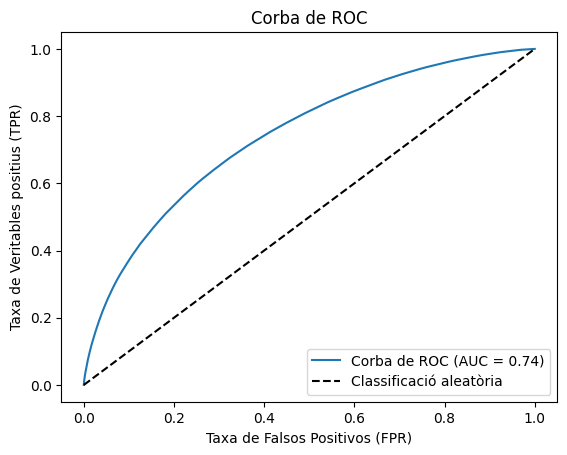

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f"Corba de ROC (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Classificació aleatòria")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Veritables positius (TPR)")
plt.title("Corba de ROC")
plt.legend(loc="lower right")
plt.show()

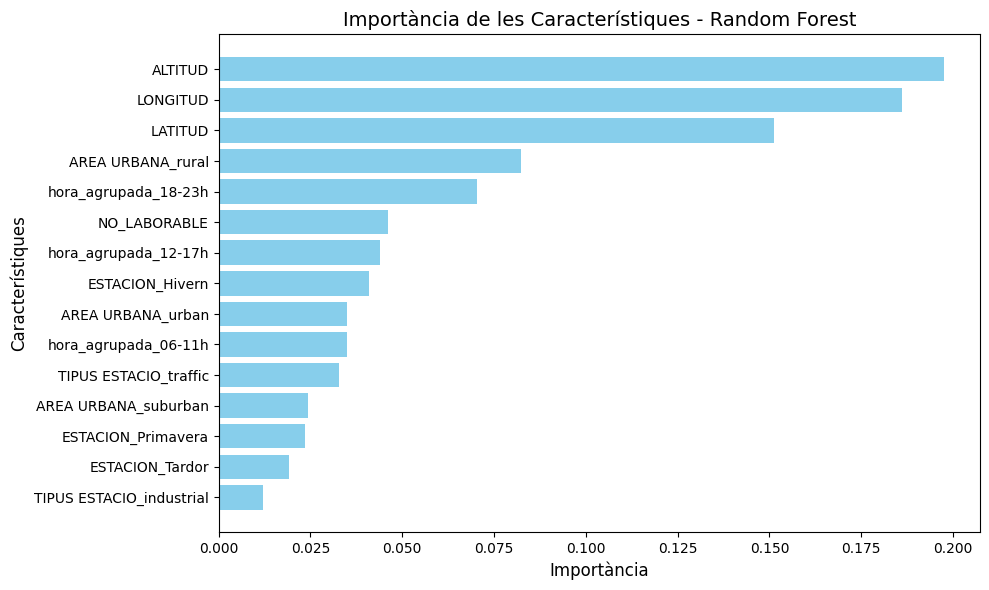

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener la importancia de las características del modelo Random Forest
importances = model_rf.feature_importances_
feature_names = X.columns  # Nombres de las características
sorted_indices = np.argsort(importances)[::-1]  # Ordenar las características por importancia descendente

# Crear un DataFrame para las importancias
feature_importances = pd.DataFrame({
    'Característica': feature_names[sorted_indices],
    'Importància': importances[sorted_indices]
})

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Característica'], feature_importances['Importància'], color='skyblue')
plt.xlabel('Importància', fontsize=12)
plt.ylabel('Característiques', fontsize=12)
plt.title('Importància de les Característiques - Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.tight_layout()
plt.show()


#### Model no supervisat
Pel model no supervisat aplicarem la tècnica de clustering. Aquest model ens ajudarà a respondre a la pregunta de com es relacionen els pics de concentració de contaminants amb el tipus d'estació (urbana, rural, etc.). Per reduïr la complexitat del problema ens centrarem en el contaminant NO2 i veurem si hi ha alguna relació entre els valors d'aquest contaminant al Vallès Occidental. 

In [29]:
# Busquem el nombre òptim de clusters entre 2 i 10
def find_optimal_clusters(data, max_k=10):
    inertia = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Considerem almenys 2 clústers
    
    for k in K:
        print(f'Analyzing {k} clusters')
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Apliquem el mètode del colze per trobar el nombre òptim de clusters
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, inertia, 'bo-', label='Inertia')
    plt.xlabel('Nombre de clústers')
    plt.ylabel('Inertia')
    plt.title('Mètode del colze')
    plt.grid()
    
    # Plot del silhouette score
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
    plt.xlabel('Nombre de clústers')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    return inertia, silhouette_scores

In [30]:
plt.rcParams['agg.path.chunksize'] = 10000

In [31]:
df_filtered = df_classificat[df_classificat['CONTAMINANT'].isin(["NO2", "SO2"])]
df_filtered = df_filtered[df_filtered['NOM COMARCA'] == 'Vallès Occidental']

In [32]:
df_filtered.head(10)

,DATA,CODI EOI,CONTAMINANT,NOM ESTACIO,MAGNITUD,UNITATS,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,...,LONGITUD,LATITUD,Georeferència,hora,valor_mesurat,QUALITAT,NO_LABORABLE,ESTACION,hora_numeric,hora_agrupada
39,2024-12-24,8184006,NO2,Rubí,8,µg/m3,background,urban,8184,Rubí,...,2.042497,41.492115,NaN,01h,57.0,Raonablement Bona,0,Hivern,1,00-05h
43,2024-12-24,8279011,SO2,Terrassa,1,µg/m3,traffic,urban,8279,Terrassa,...,2.007398,41.556114,NaN,01h,3.0,Bona,0,Hivern,1,00-05h
44,2024-12-24,8252006,NO2,Barberà del Vallès,8,µg/m3,background,urban,8252,Barberà del Vallès,...,2.125398,41.512684,NaN,01h,23.0,Bona,0,Hivern,1,00-05h
58,2024-12-24,8260010,NO2,Santa Perpètua de Mogoda,8,µg/m3,traffic,suburban,8260,Santa Perpètua de Mogoda,...,2.183800,41.526722,NaN,01h,44.0,Raonablement Bona,0,Hivern,1,00-05h
82,2024-12-24,8184006,SO2,Rubí,1,µg/m3,background,urban,8184,Rubí,...,2.042497,41.492115,NaN,01h,1.0,Bona,0,Hivern,1,00-05h
116,2024-12-24,8279011,NO2,Terrassa,8,µg/m3,traffic,urban,8279,Terrassa,...,2.007398,41.556114,NaN,01h,38.0,Bona,0,Hivern,1,00-05h
128,2024-12-24,8125002,NO2,Montcada i Reixac,8,µg/m3,traffic,suburban,8125,Montcada i Reixac,...,2.188298,41.481970,NaN,01h,44.0,Raonablement Bona,0,Hivern,1,00-05h
158,2024-12-24,8187012,NO2,Sabadell,8,µg/m3,traffic,urban,8187,Sabadell,...,2.101111,41.561214,NaN,01h,28.0,Bona,0,Hivern,1,00-05h
175,2024-12-24,8260010,SO2,Santa Perpètua de Mogoda,1,µg/m3,traffic,suburban,8260,Santa Perpètua de Mogoda,...,2.183800,41.526722,NaN,01h,1.0,Bona,0,Hivern,1,00-05h
197,2024-12-24,8125002,SO2,Montcada i Reixac,1,µg/m3,traffic,suburban,8125,Montcada i Reixac,...,2.188298,41.481970,NaN,01h,2.0,Bona,0,Hivern,1,00-05h


In [33]:
df_filtered = df_filtered[["DATA","NOM ESTACIO",'CONTAMINANT',"hora",'valor_mesurat']]
df_filtered["valor_mesurat"] = pd.to_numeric(df_filtered["valor_mesurat"], errors="coerce")
df_pivot = df_filtered.pivot_table(index=["DATA","NOM ESTACIO","hora"], columns="CONTAMINANT", values="valor_mesurat", aggfunc="mean").reset_index()
df_pivot_clean = df_pivot.dropna(subset=['NO2', 'SO2'])
df_pivot_clean['DATA'] = pd.to_datetime(df_pivot_clean['DATA'], errors='coerce')
df_pivot_clean = df_pivot_clean[(df_pivot_clean['DATA'] >= '2022-01-01') & (df_pivot_clean['DATA'] <= '2024-11-30')]

C:\Users\anaga\AppData\Local\Temp\ipykernel_19624\2691263764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_clean['DATA'] = pd.to_datetime(df_pivot_clean['DATA'], errors='coerce')


In [34]:
df_pivot_clean.head(10)

CONTAMINANT,DATA,NOM ESTACIO,hora,NO2,SO2
1675538,2022-01-01,Montcada i Reixac,01h,27.0,2.0
1675539,2022-01-01,Montcada i Reixac,02h,33.0,1.0
1675540,2022-01-01,Montcada i Reixac,03h,27.0,1.0
1675541,2022-01-01,Montcada i Reixac,04h,25.0,1.0
1675542,2022-01-01,Montcada i Reixac,05h,22.0,1.0
1675543,2022-01-01,Montcada i Reixac,06h,18.0,1.0
1675544,2022-01-01,Montcada i Reixac,07h,15.0,1.0
1675545,2022-01-01,Montcada i Reixac,08h,17.0,1.0
1675546,2022-01-01,Montcada i Reixac,09h,15.0,1.0
1675547,2022-01-01,Montcada i Reixac,10h,16.0,1.0


In [35]:
# Escalem les dades per tenir els valors en el mateix rang
df_cluster = df_pivot_clean[['NO2', 'SO2']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

Analyzing 2 clusters
Analyzing 3 clusters
Analyzing 4 clusters
Analyzing 5 clusters
Analyzing 6 clusters
Analyzing 7 clusters
Analyzing 8 clusters
Analyzing 9 clusters
Analyzing 10 clusters


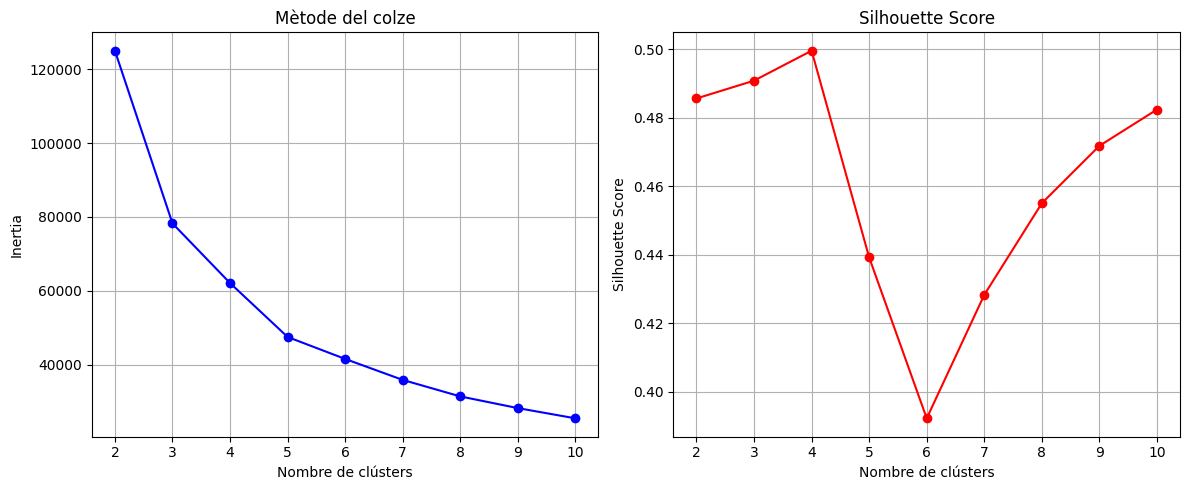

Nombre òptim de clústers segons Silhouette Score: 4


In [36]:
# Trobem el nombre òptim de clusters
inertia, silhouette_scores = find_optimal_clusters(df_scaled)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 perquè K comença en 2
print(f"Nombre òptim de clústers segons Silhouette Score: {optimal_k}")

In [37]:
# Apliquem el mètode de clustering
kmean = KMeans(n_clusters=optimal_k, random_state=42)
df_pivot_clean['cluster'] = kmean.fit_predict(df_scaled)

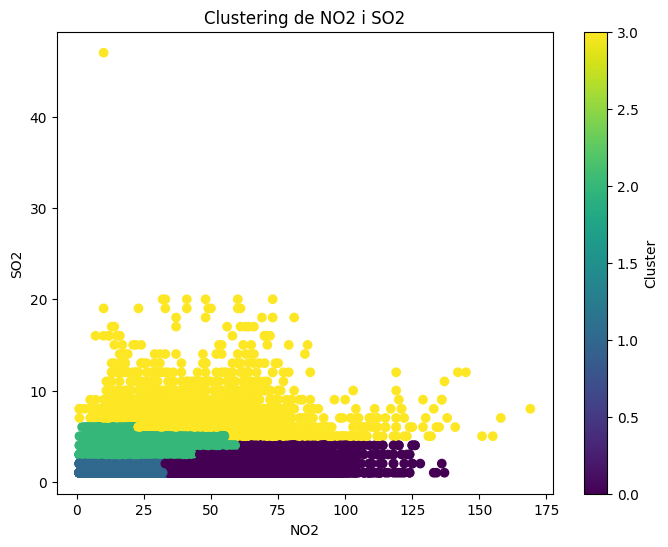

In [38]:
# Visualització dels resultats en un gràfic
plt.figure(figsize=(8,6))
plt.scatter(df_pivot_clean['NO2'], df_pivot_clean['SO2'], c=df_pivot_clean['cluster'], cmap='viridis')
plt.xlabel('NO2')
plt.ylabel('SO2')
plt.title('Clustering de NO2 i SO2')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
# Filtrar les concentracions de NO2 i SO2
no2_values = df_pivot_clean['NO2'].dropna()
so2_values = df_pivot_clean['SO2'].dropna()

# Assegurar-nos que les dues sèries tinguin la mateixa longitud (eliminant NaN de totes dues)
df_corr = pd.concat([no2_values, so2_values], axis=1).dropna()

# Realitzar la correlació de Pearson
correlation, p_value = pearsonr(df_corr['NO2'], df_corr['SO2'])

# Mostrar els resultats
print(f'Coeficient de correlació de Pearson: {correlation}')
print(f'P-value: {p_value}')

# Interpretació dels resultats
if p_value < 0.05:
    print("Hi ha una relació significativa entre NO2 i SO2.")
else:
    print("No hi ha una relació significativa entre NO2 i SO2.")

Coeficient de correlació de Pearson: 0.13862289393330834
P-value: 0.0
Hi ha una relació significativa entre NO2 i SO2.
